In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from sklearn.datasets import load_digits 
from sklearn.model_selection import train_test_split

import seaborn as sns 
from sklearn import metrics
%matplotlib inline 
digits = load_digits()

In [5]:
print(" Image Data Shape",digits.data.shape)
print(" Label Data Shape",digits.data.shape)

 Image Data Shape (1797, 64)
 Label Data Shape (1797, 64)


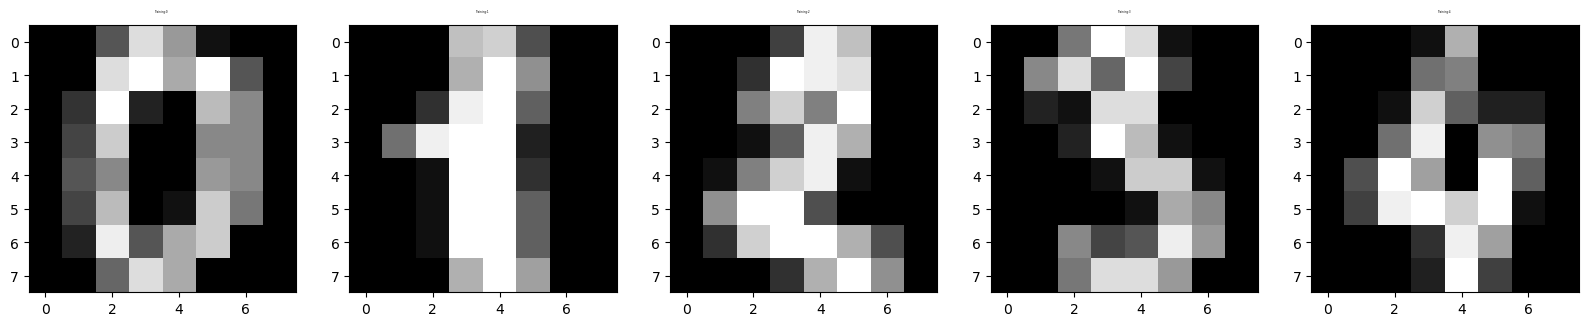

In [18]:
plt.figure(figsize = (20,4))
for index,(image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('Training:%i\n'% label,fontsize=2)

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(digits.data,digits.target,
                                            test_size = 0.23,random_state = 2)

In [22]:
xtrain.shape

(1383, 64)

In [24]:
ytrain.shape

(1383,)

In [25]:
xtest.shape

(414, 64)

In [30]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression()
logR.fit(xtrain ,ytrain)

C:\Users\kumar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
pred = logR.predict(xtest)


In [37]:
score = logR.score(xtest,ytest)
print(score)

0.9516908212560387


In [47]:
cm = metrics.confusion_matrix(ytest,pred)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


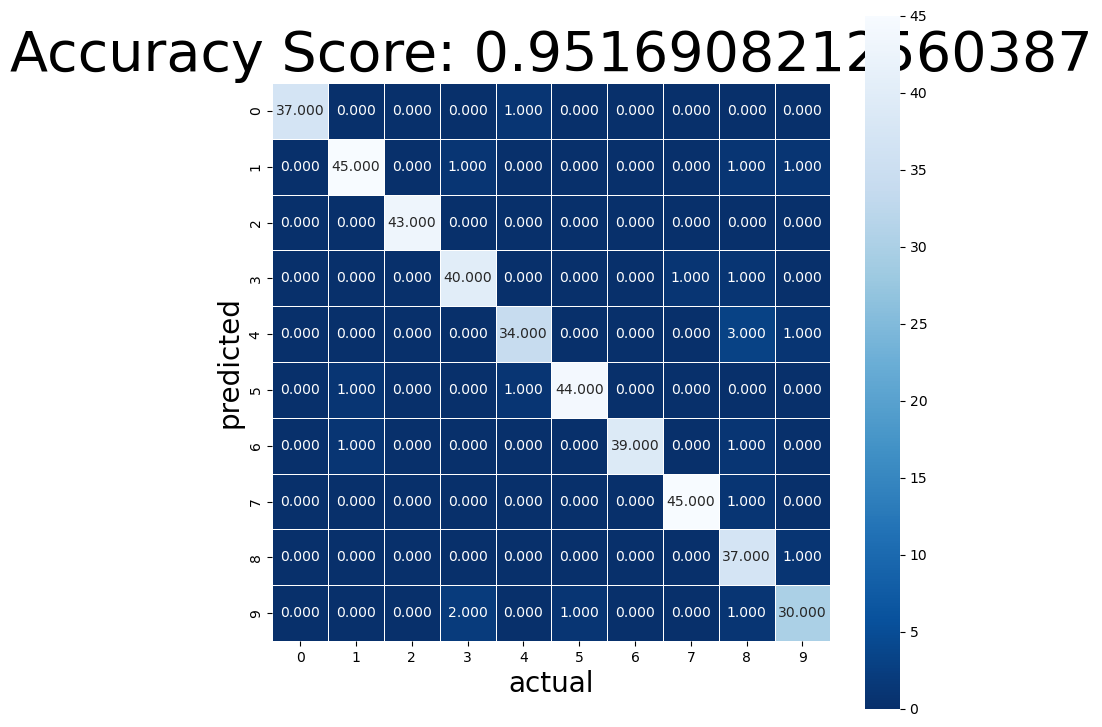

In [51]:
plt.figure(figsize = (9,9))
sns.heatmap(cm,annot = True,fmt = ".3f",linewidths = .5,square = True,cmap = 'Blues_r');
plt.xlabel('actual',size = 20)
plt.ylabel('predicted',size = 20)
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title,size = 40)
plt.show()

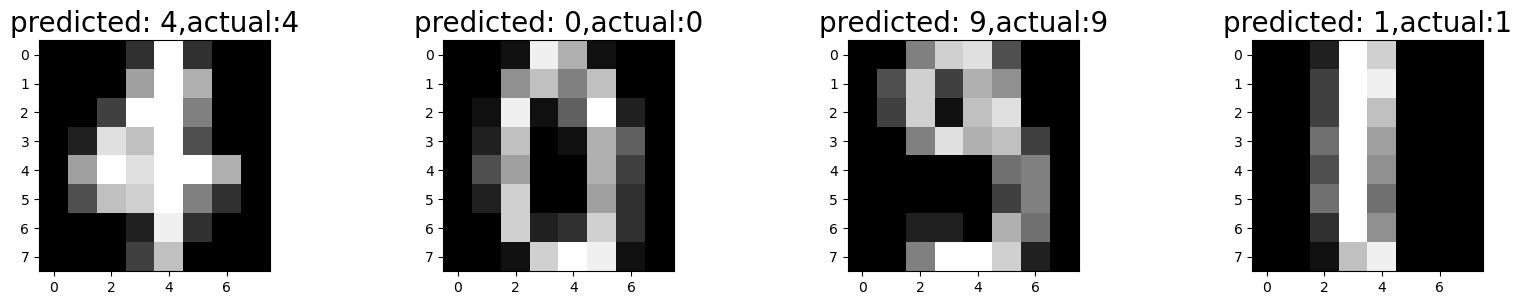

In [56]:
index = 0
classifiedIndex =[]
for predict,actual in zip(pred,ytest):
    if predict==actual:
        classifiedIndex.append(index)
        
    index +=1
plt.figure(figsize = (20,3))
for plotIndex,wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4,plotIndex +1)
    plt.imshow(np.reshape(xtest[wrong],(8,8)),cmap=plt.cm.gray)
    plt.title('predicted: {},actual:{}'.format(pred[wrong],ytest[wrong]),fontsize = 20)
